In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
from matplotlib import pyplot as plt

# set float type display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# set plots size
plt.rcParams['figure.figsize'] = [ 20, 10 ]

## 0. Carga

In [2]:
df_raw = pd.read_csv('../data/raw/kc_house_data.csv')
print(df_raw.info())
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 1. Tratamento

#### 1.1. Verificar nulos

In [3]:
df_raw.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 1.2. Verificar duplicidades

In [4]:
df_raw.loc[df_raw['id'].duplicated(keep=False)].sort_values('id')
# IDs repetidos mostram evolução do preço do imóvel ao passar do tempo

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
16814,7200179,20141016T000000,150000.00,2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
16815,7200179,20150424T000000,175000.00,2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
11434,109200390,20141020T000000,250000.00,3,1.75,1480,3900,1.00,0,0,...,7,1480,0,1980,0,98023,47.30,-122.37,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,20140627T000000,260000.00,2,1.00,700,4800,1.00,0,0,...,7,700,0,1922,0,98122,47.61,-122.30,1440,4800
15200,9834200305,20150210T000000,615000.00,3,1.00,1790,3876,1.50,0,0,...,7,1090,700,1904,0,98144,47.58,-122.29,1360,4080
15199,9834200305,20140716T000000,350000.00,3,1.00,1790,3876,1.50,0,0,...,7,1090,700,1904,0,98144,47.58,-122.29,1360,4080
1085,9834200885,20140717T000000,360000.00,4,2.50,2080,4080,1.00,0,0,...,7,1040,1040,1962,0,98144,47.57,-122.29,1340,4080


#### 1.3. Verificar tipos

In [5]:
# corrigir data
df_raw['date'] = pd.to_datetime(df_raw.date,format='mixed')
# corrigir float > int
df_raw['bathrooms'] = df_raw['bathrooms'].astype('int64')
df_raw['floors']    = df_raw['floors'].astype('int64')
# remover colunar ambiguas
df_raw = df_raw.drop(columns=['sqft_living15','sqft_lot15'])

## 2. Análise Descritiva

In [6]:
# filtrar variáveis numéricas
num_attributes = df_raw.select_dtypes(include=['int64','float64'])
# criar mais métricas descritivas
_range    = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
_skew     = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
_kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
ds_num = pd.concat( [ _range, _skew, _kurtosis] ).T.reset_index()
ds_num.columns = ['index','range','skew','kurtosis']
# unir métricas
df_raw.describe().T.reset_index().merge(ds_num,how='left',on='index')

,index,count,mean,min,25%,50%,75%,max,std,range,skew,kurtosis
0,id,21613.00,4580301520.86,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00,2876565571.31,9899000088.00,0.24,-1.26
1,date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN
2,price,21613.00,540088.14,75000.00,321950.00,450000.00,645000.00,7700000.00,367127.20,7625000.00,4.02,34.59
3,bedrooms,21613.00,3.37,0.00,3.00,3.00,4.00,33.00,0.93,33.00,1.97,49.06
4,bathrooms,21613.00,1.75,0.00,1.00,2.00,2.00,8.00,0.73,8.00,0.90,1.99
5,sqft_living,21613.00,2079.90,290.00,1427.00,1910.00,2550.00,13540.00,918.44,13250.00,1.47,5.24
6,sqft_lot,21613.00,15106.97,520.00,5040.00,7618.00,10688.00,1651359.00,41420.51,1650839.00,13.06,285.08
7,floors,21613.00,1.45,1.00,1.00,1.00,2.00,3.00,0.55,2.00,0.73,-0.55
8,waterfront,21613.00,0.01,0.00,0.00,0.00,0.00,1.00,0.09,1.00,11.39,127.63
9,view,21613.00,0.23,0.00,0.00,0.00,0.00,4.00,0.77,4.00,3.40,10.89


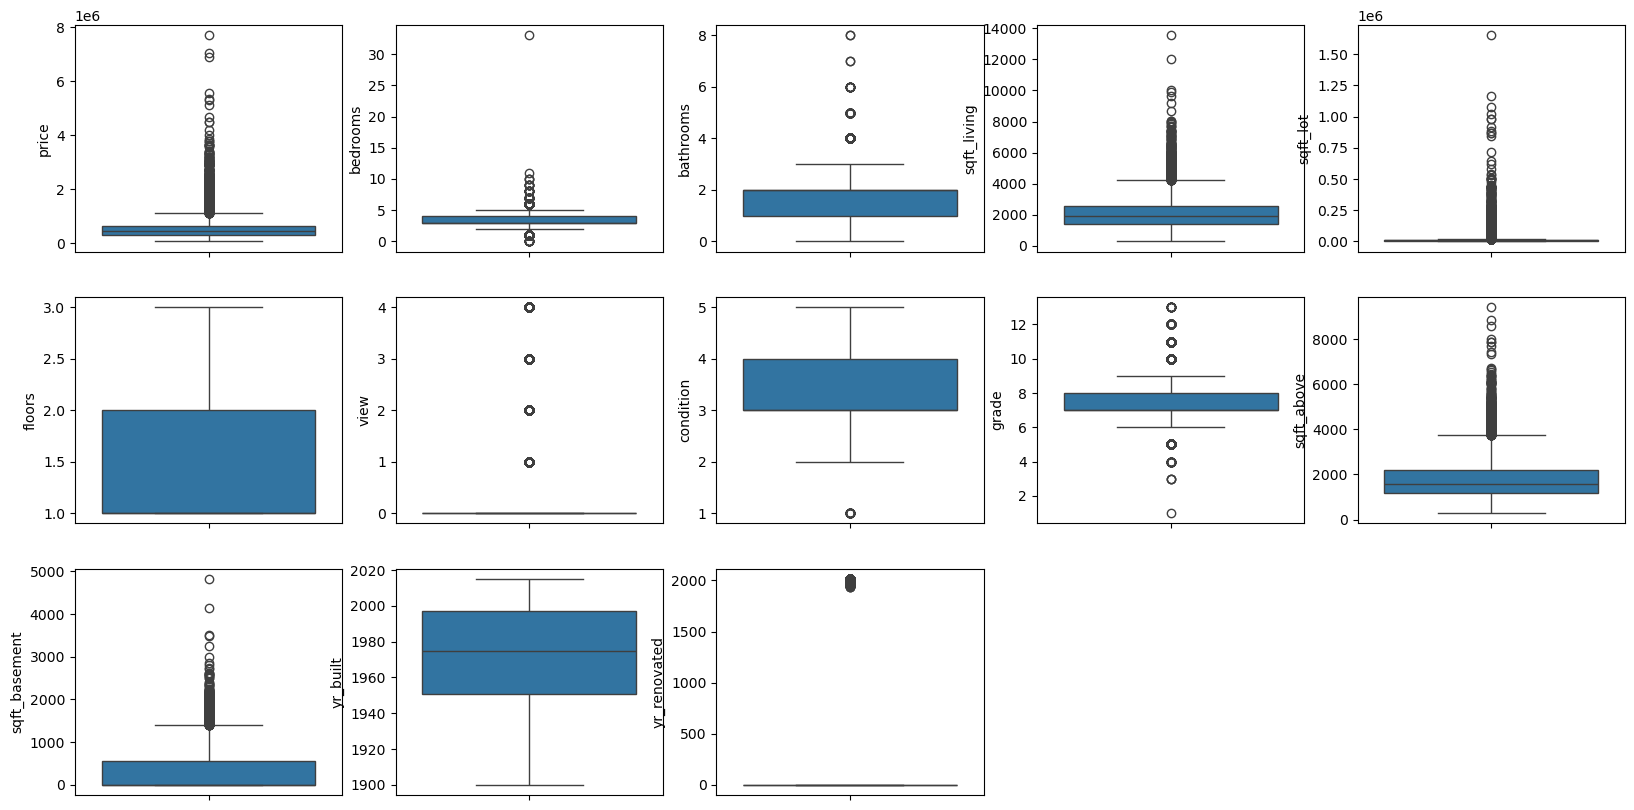

In [7]:
# análise de bloxplot
cols_boxplot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
                'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for i in range(len(cols_boxplot)):
    plt.subplot(3,5,i+1)
    sns.boxplot(df_raw[cols_boxplot[i]])

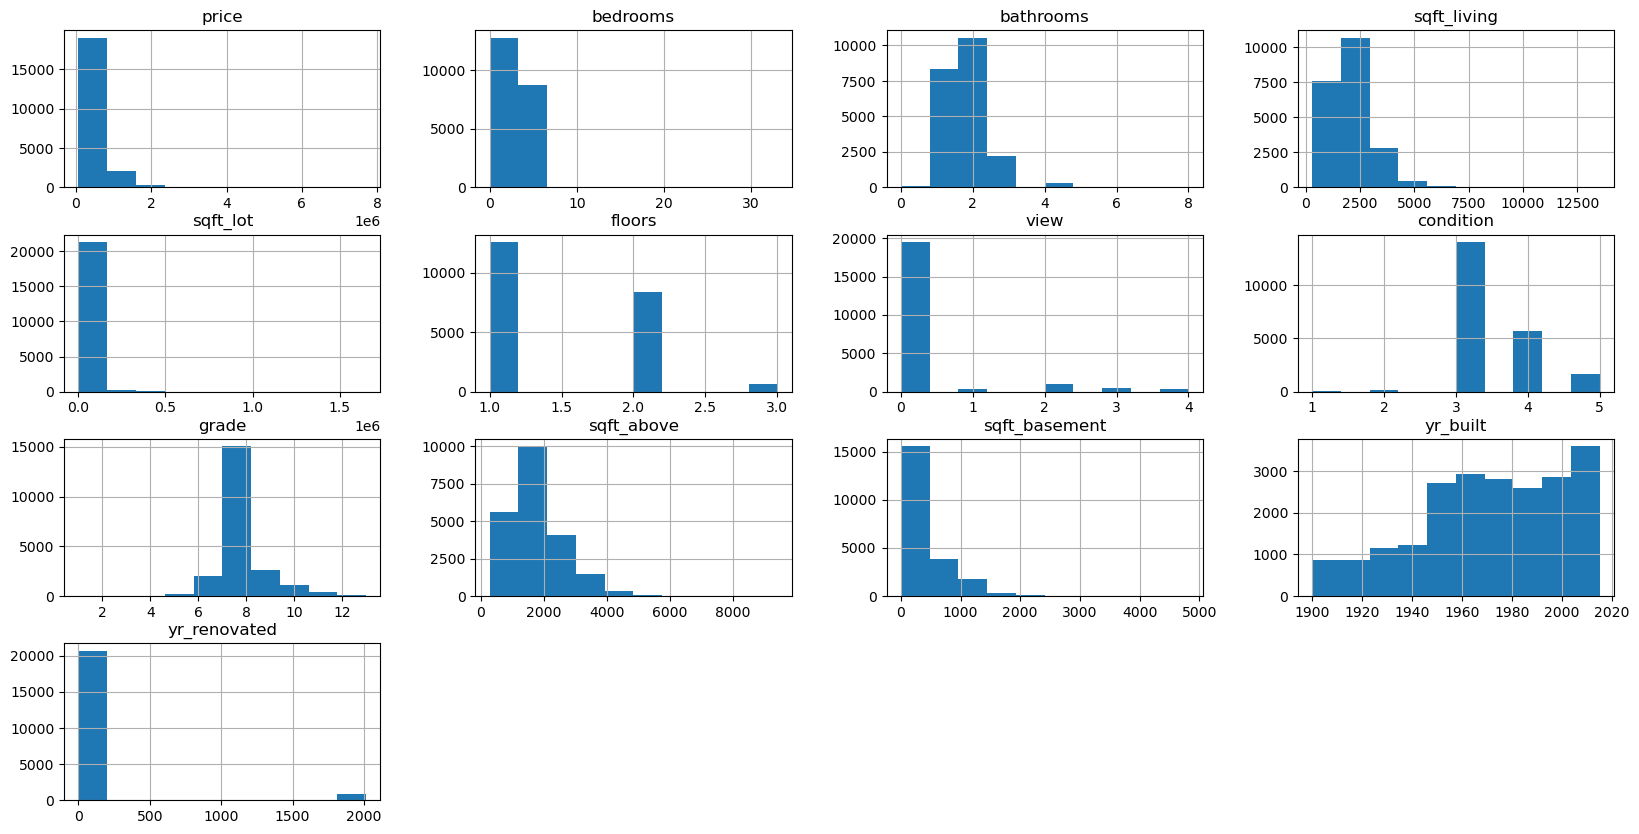

In [8]:
df_raw[cols_boxplot].hist();

In [9]:
df_raw[['price','waterfront']].groupby('waterfront').mean().reset_index()
# casas de frente para o mar custam até 3x o valor de uma casa sem vista para o mar

,waterfront,price
0,0,531563.60
1,1,1661876.02


   waterfront     id
0           0  21450
1           1    163


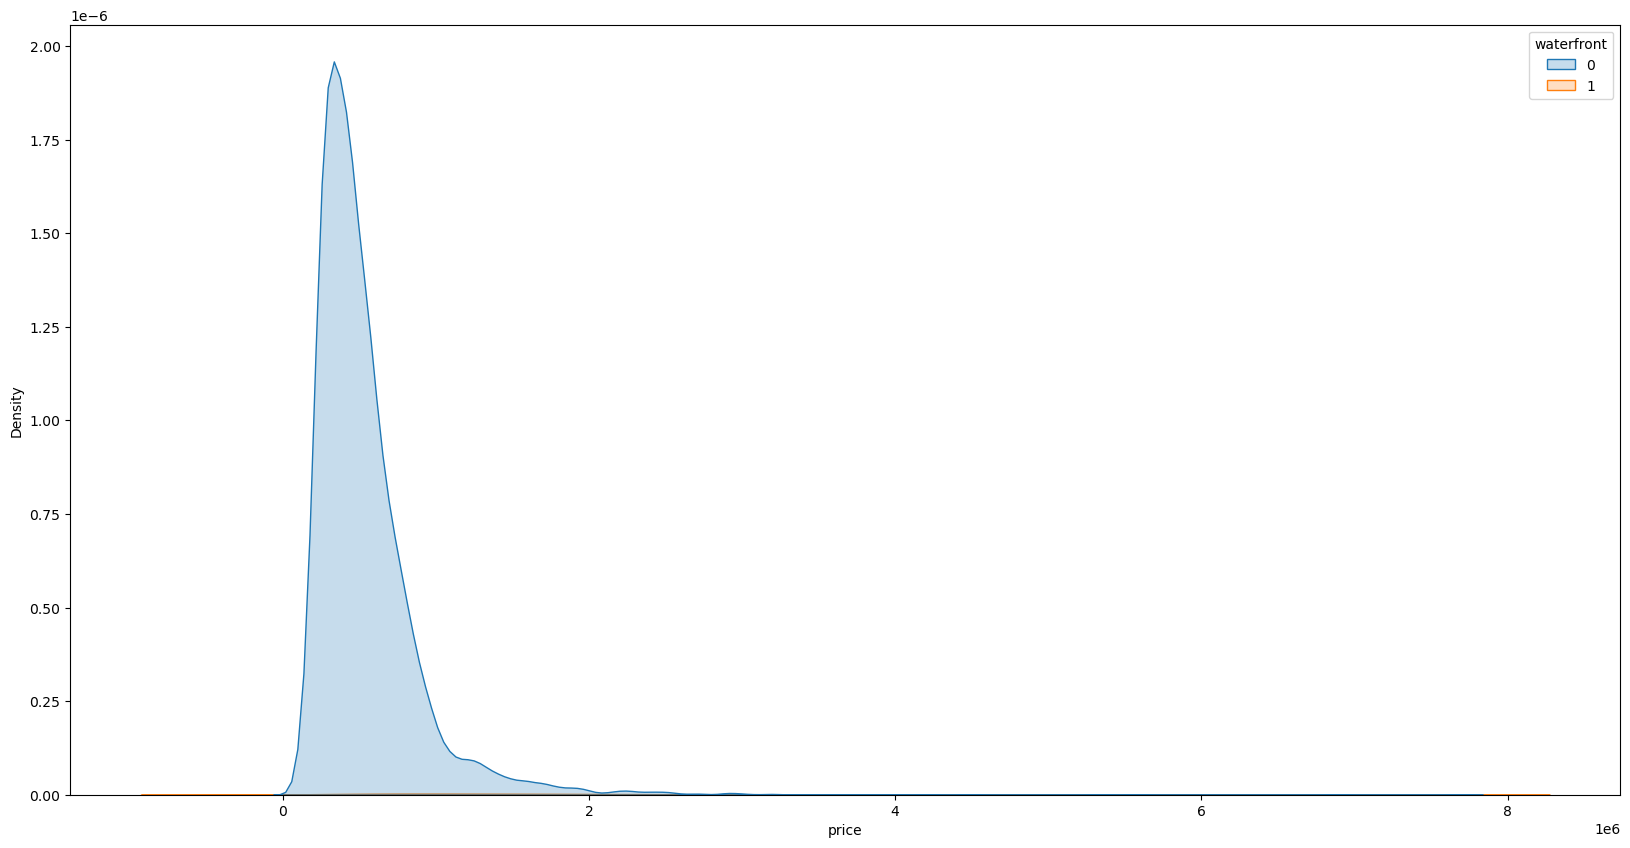

In [10]:
print(df_raw[['id','waterfront']].groupby('waterfront').count().reset_index())
sns.kdeplot(data=df_raw, x="price", hue="waterfront", fill=True);
# casas de frente para o mar são a minoria no dataset

#### 1.5 Cleaning

In [11]:
# verificar outlier na coluna bedrooms
aux = pd.concat([df_raw[df_raw.bedrooms==3].mean().reset_index(),df_raw[df_raw.bedrooms==33].T.reset_index().drop('index',axis=1)],axis=1)
aux.columns = ['index','avg_bed_3','bed_33']
aux

,index,avg_bed_3,bed_33
0,id,4535884163.44,2402100895
1,date,2014-10-29 22:05:48.859934976,2014-06-25 00:00:00
2,price,466232.08,640000.00
3,bedrooms,3.00,33
4,bathrooms,1.60,1
5,sqft_living,1805.84,1620
6,sqft_lot,14414.79,6000
7,floors,1.41,1
8,waterfront,0.01,0
9,view,0.19,0


In [12]:
# correção de outlier
df_raw.loc[df_raw.bedrooms == 33,'bedrooms'] = 3

## 3. Levantamento de hipóteses

##### 3.1. Imóveis com vista para água são 20% mais caros que a média [FALSO]

   media_geral  media_waterfront   perc
0    540088.14        1661876.02 307.70


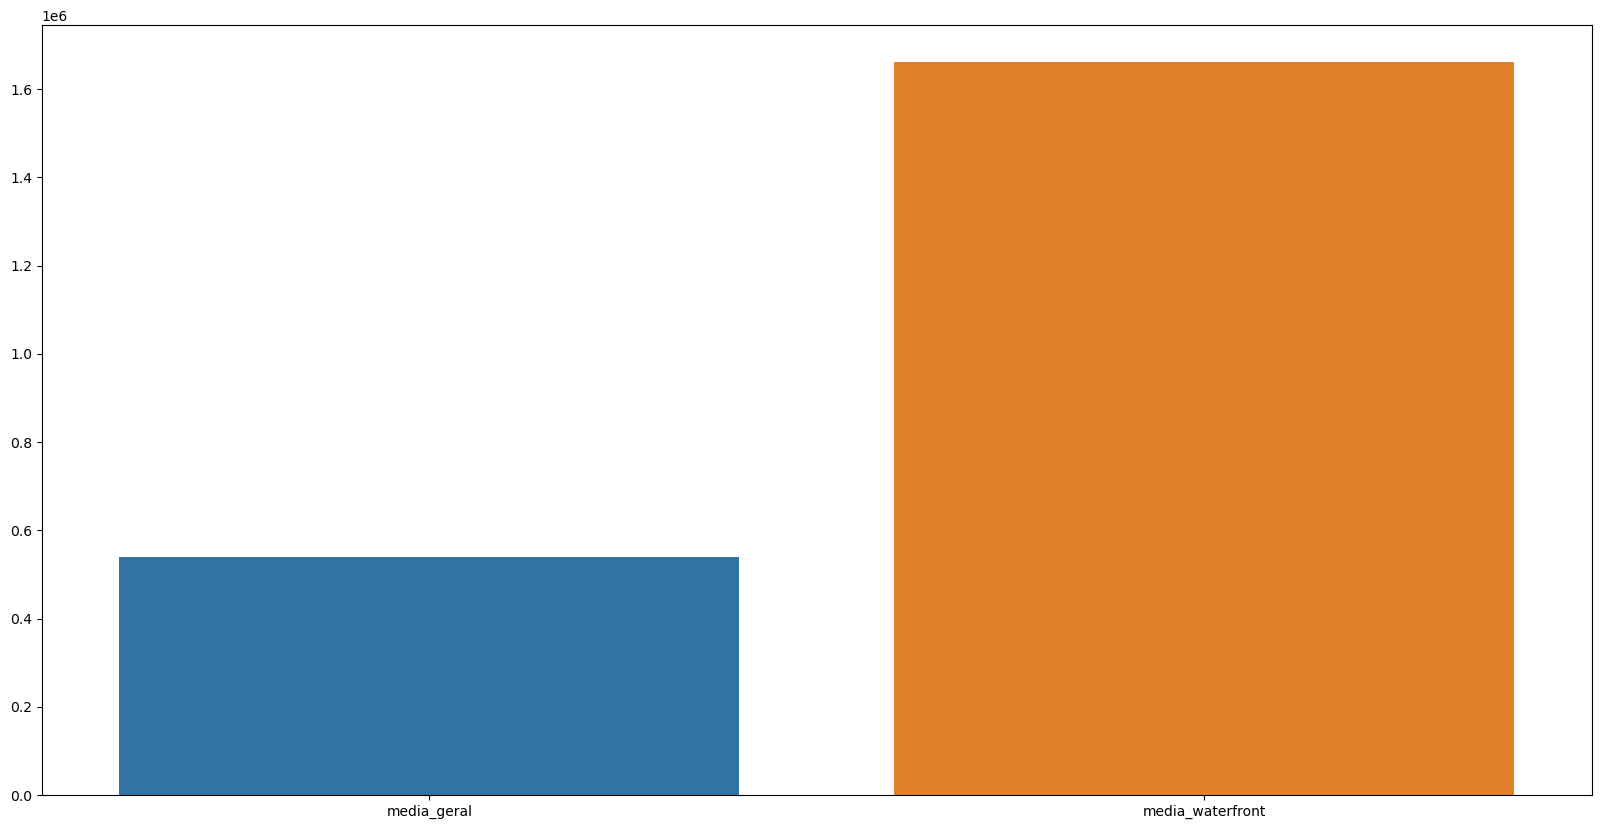

In [13]:
d = { 'media_geral' : df_raw.price.mean(), 'media_waterfront' : df_raw.loc[df_raw.waterfront==1,'price'].mean() }
aux = pd.DataFrame(d,index=[0])
aux['perc'] = aux.media_waterfront/aux.media_geral*100
print(aux)
sns.barplot(aux[['media_geral','media_waterfront']]);

##### 3.2. O valor de imóveis com data de construção menor que 1955 estão abaixo da média [VERDADEIRO]

   media_geral  media_yr1955  perc
0    540088.14     537050.91 -0.56


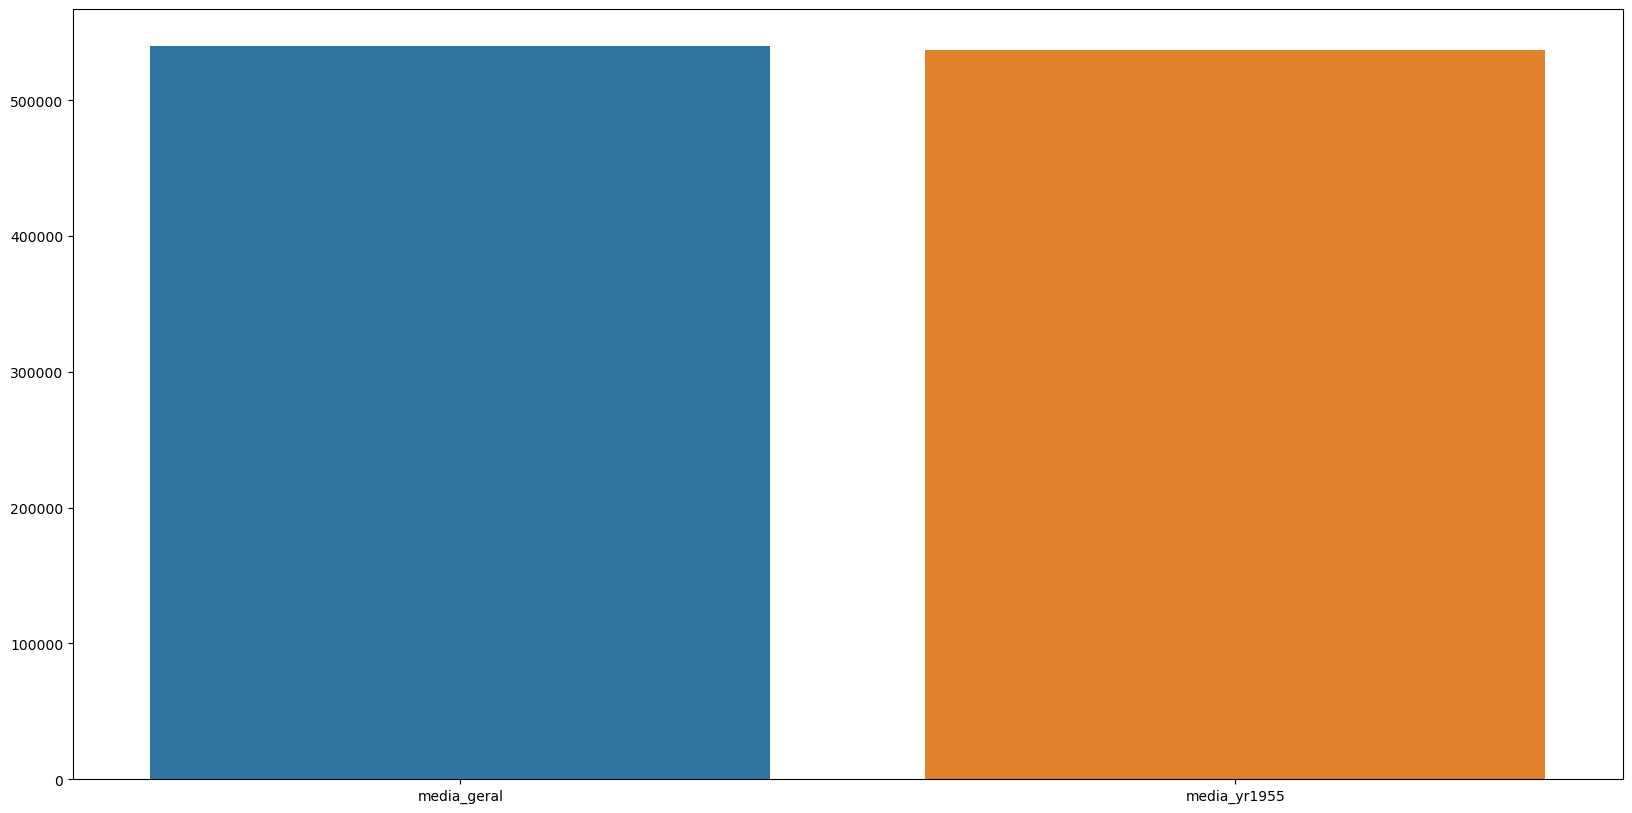

In [14]:
d = { 'media_geral' : df_raw.price.mean(), 'media_yr1955' : df_raw.loc[df_raw.yr_built<1955,'price'].mean() }
aux = pd.DataFrame(d,index=[0])
aux['perc'] = (aux.media_yr1955/aux.media_geral-1)*100
print(aux)
sns.barplot(aux[['media_geral','media_yr1955']]);

##### 3.3. Imóveis sem porão são, em media, 40% maiores do que os imóveis com porão [FALSO]

   media_s_porao  media_c_porao  perc
0       16284.18       13286.29 22.56


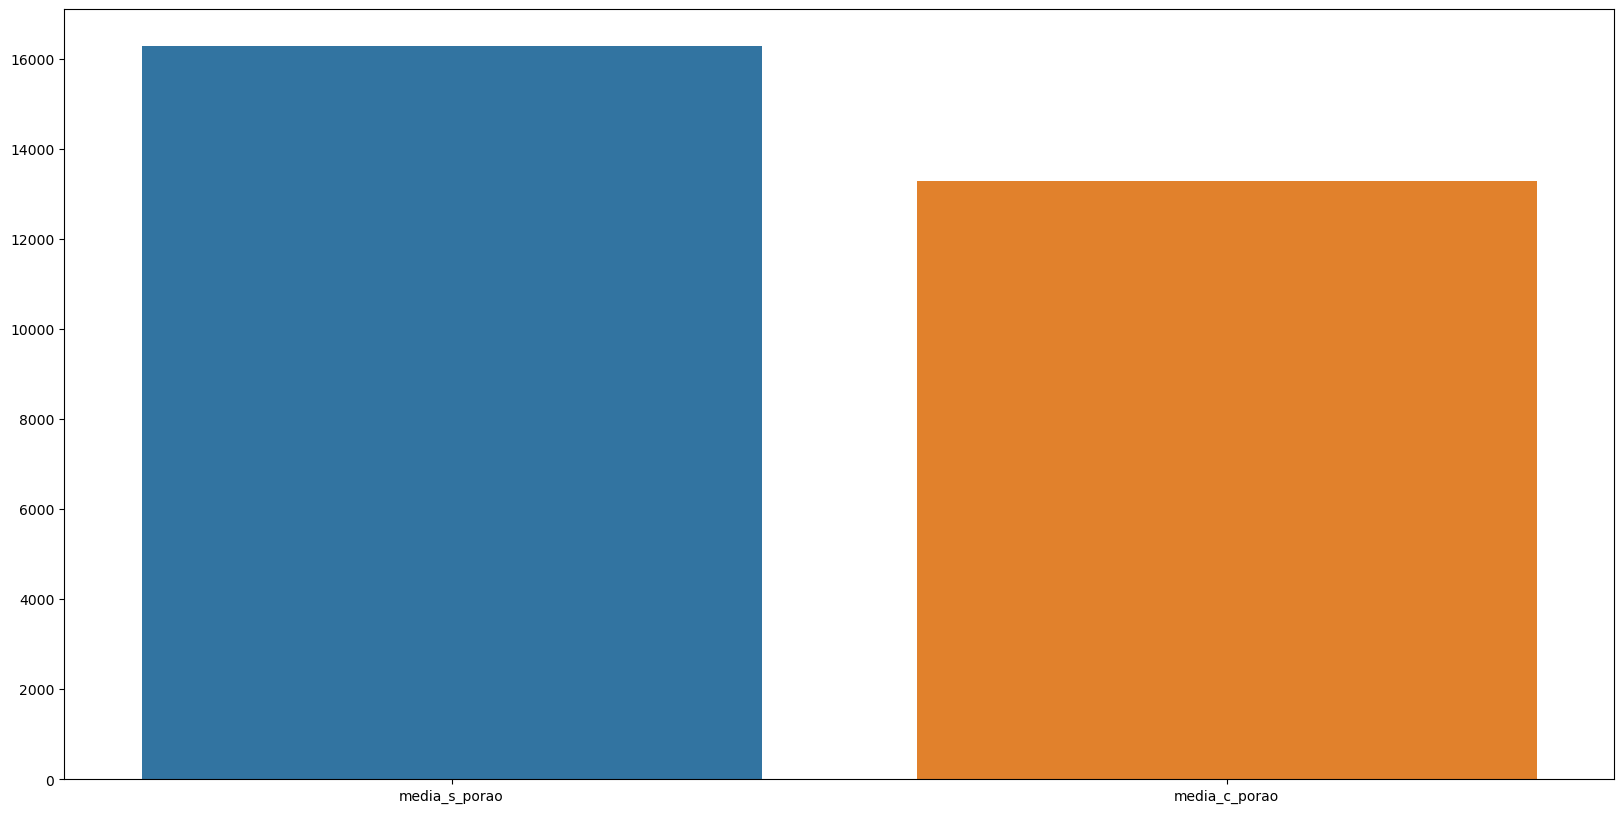

In [15]:
d = { 'media_s_porao' : df_raw[df_raw['sqft_basement']==0]['sqft_lot'].mean(), 'media_c_porao' : df_raw[df_raw['sqft_basement']!=0]['sqft_lot'].mean() }
aux = pd.DataFrame(d,index=[0])
aux['perc'] = (aux.media_s_porao/aux.media_c_porao-1)*100
print(aux)
sns.barplot(aux[['media_s_porao','media_c_porao']]);

##### 3.4. A diferença no preço dos imóveis YoY é de 10% [FALSO]

year      2014      2015  perc
0    539181.43 541988.99  0.52


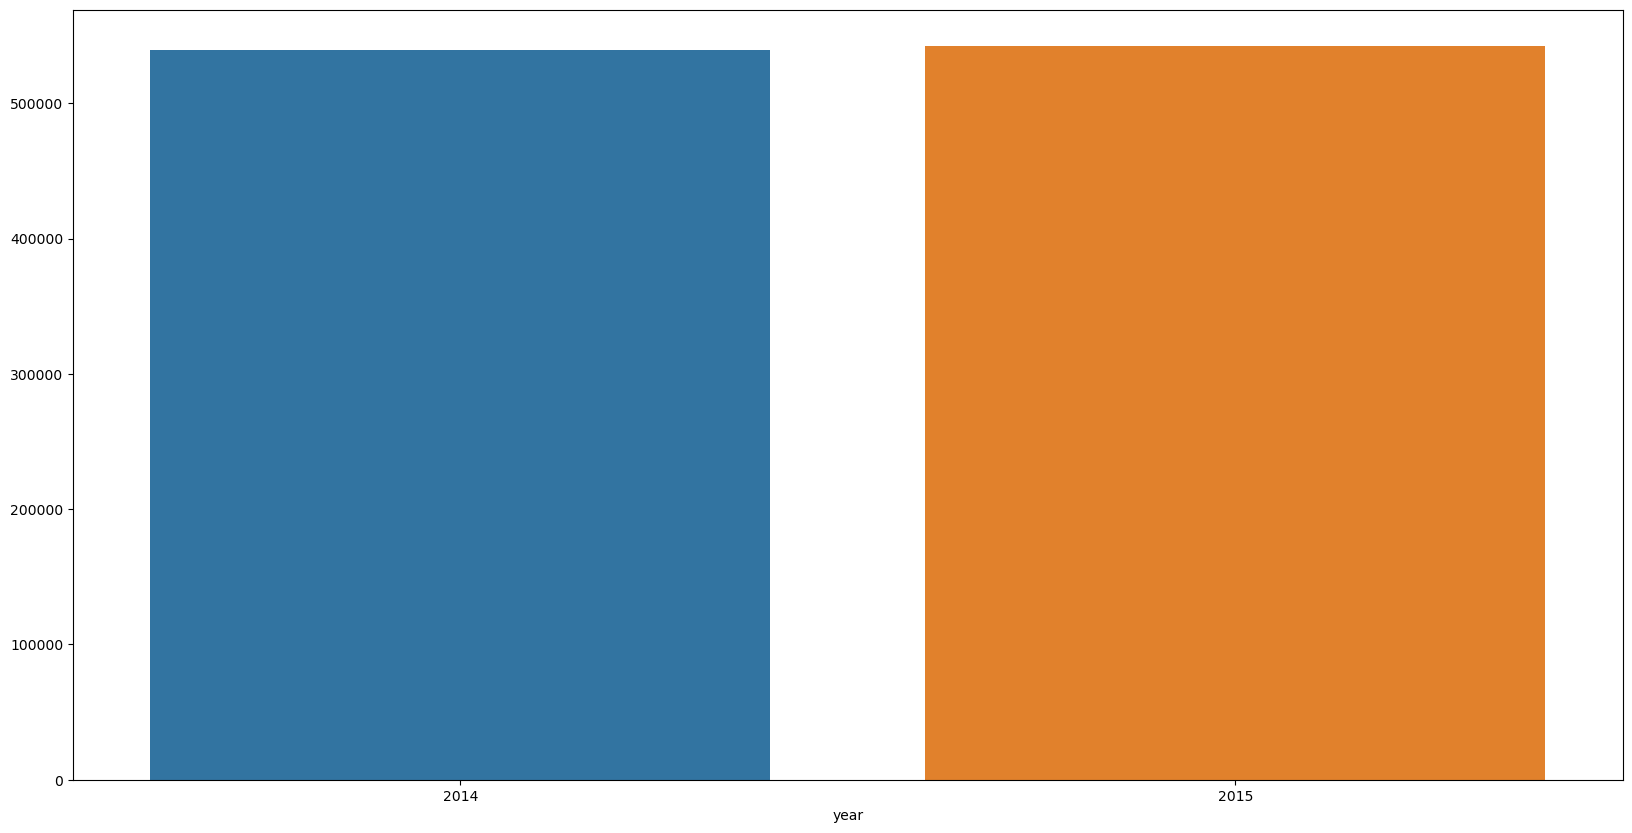

In [16]:
df_raw['year'] = df_raw.date.dt.year
aux = df_raw[['year','price']].groupby('year').mean().T.reset_index(drop=True)
aux['perc'] = (aux[2015] / aux[2014]-1)*100
print(aux)
sns.barplot(aux[[2014,2015]]);

##### 3.5. O valor dos imóveis com 3 banheiros tem uma diferença média MoM em torno de 20% [VERDADEIRO]

Variação média: 25.88%


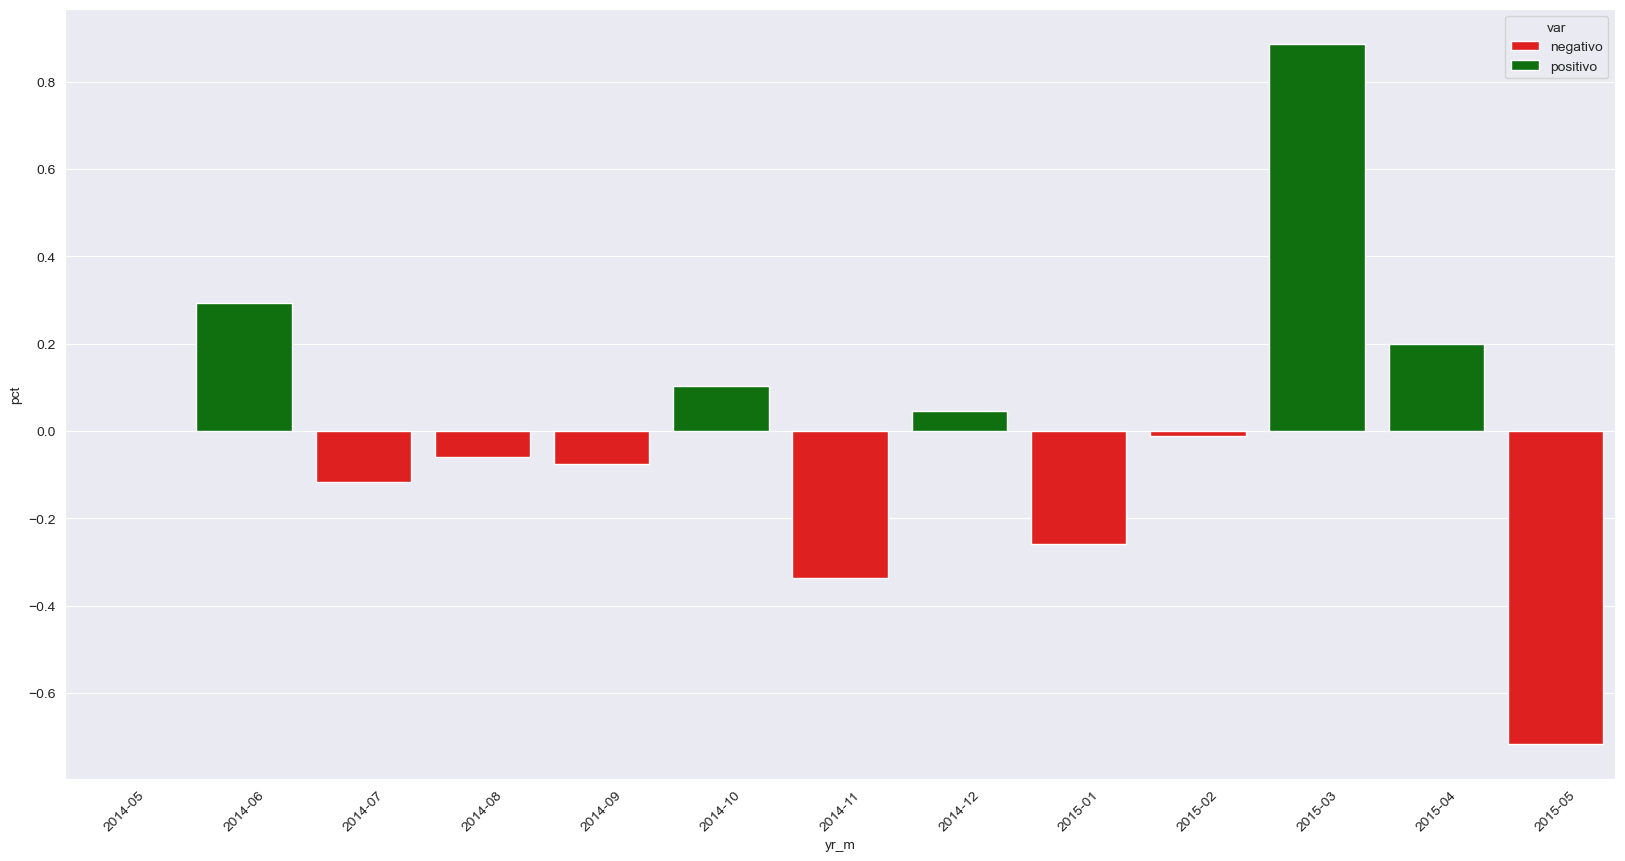

In [17]:
aux = df_raw.loc[df_raw['bathrooms']==3,:].copy()
aux['yr_m'] = aux['date'].dt.strftime('%Y-%m')
aux = aux[['yr_m','price']].groupby('yr_m').sum().reset_index()
aux['pct'] = aux['price'].pct_change()
aux['var'] = aux['pct'].apply(lambda x: 'positivo' if x>0 else 'negativo')
print(f"Variação média: { np.sqrt(np.power(aux['pct'],2)).mean()*100 :.2f}%")
sns.set_style('darkgrid')
color = ['red','green']
sns.barplot(data=aux, x='yr_m', y='pct', hue='var', palette=color);
plt.xticks(rotation=45);

##### 3.6. O valor dos imóveis com sótão é 20% mais caro do que imóveis com porão [FALSO]

      above  basement   perc
0 540088.14 622373.56 -13.22


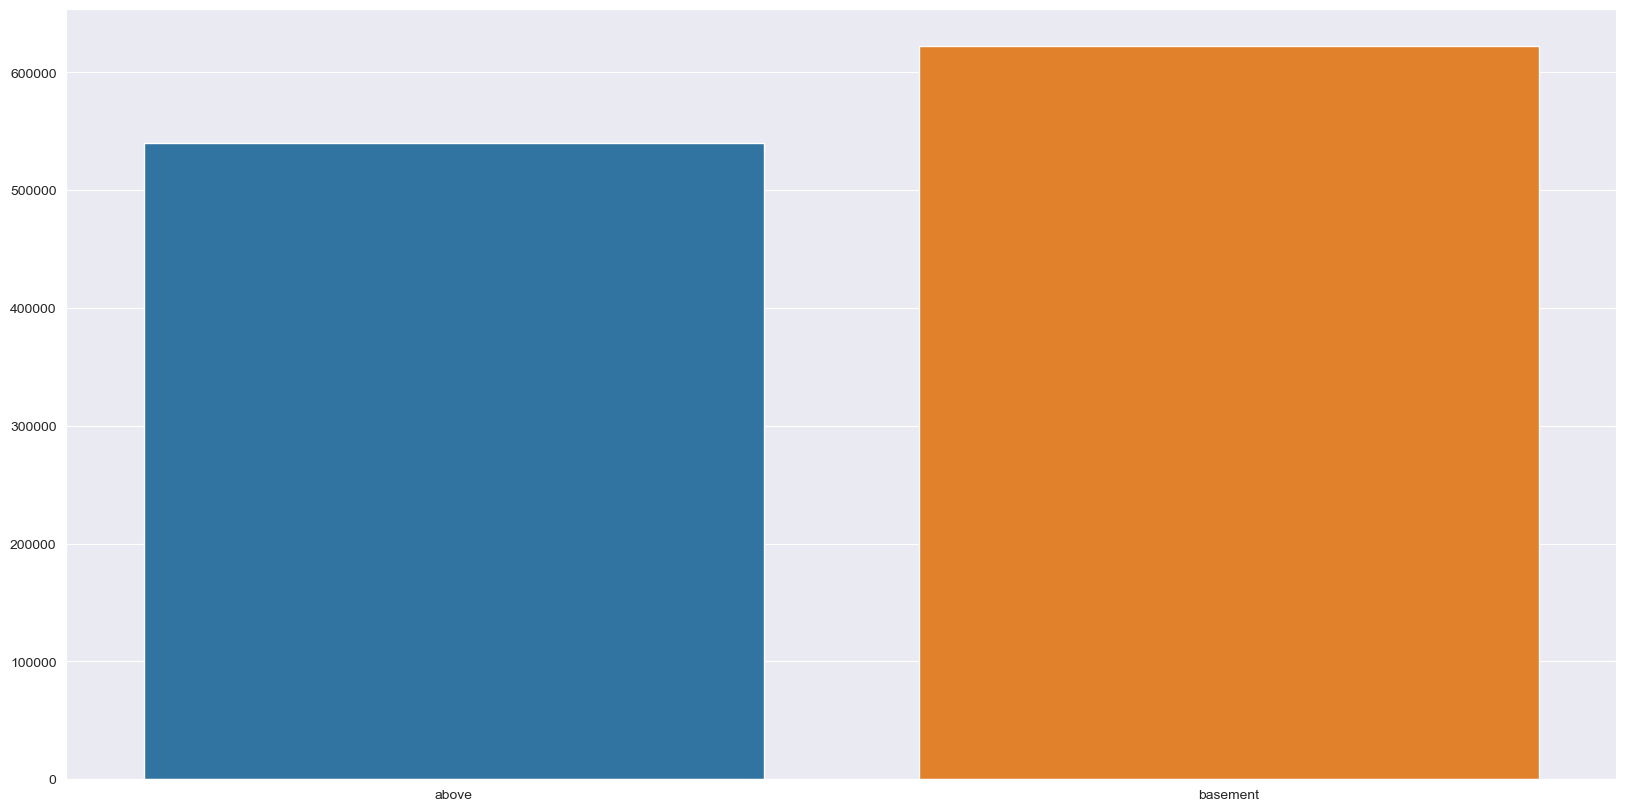

In [18]:
above = df_raw.loc[df_raw['sqft_above'] > 0, 'price'].mean()
basement = df_raw.loc[df_raw['sqft_basement'] > 0, 'price'].mean()
aux = pd.DataFrame([above,basement]).T.reset_index(drop=True)
aux = aux.rename(columns={0:'above',1:'basement'})
aux['perc'] = (aux.above / aux.basement -1)*100
print(aux)
sns.barplot(data=aux[['above','basement']]);

##### 3.7. Imóveis antigos (ano de construção < 2000) reformados são mais caros do que imóveis novos [VERDADEIRO]

        old       new  perc
0 760308.25 618316.54 22.96


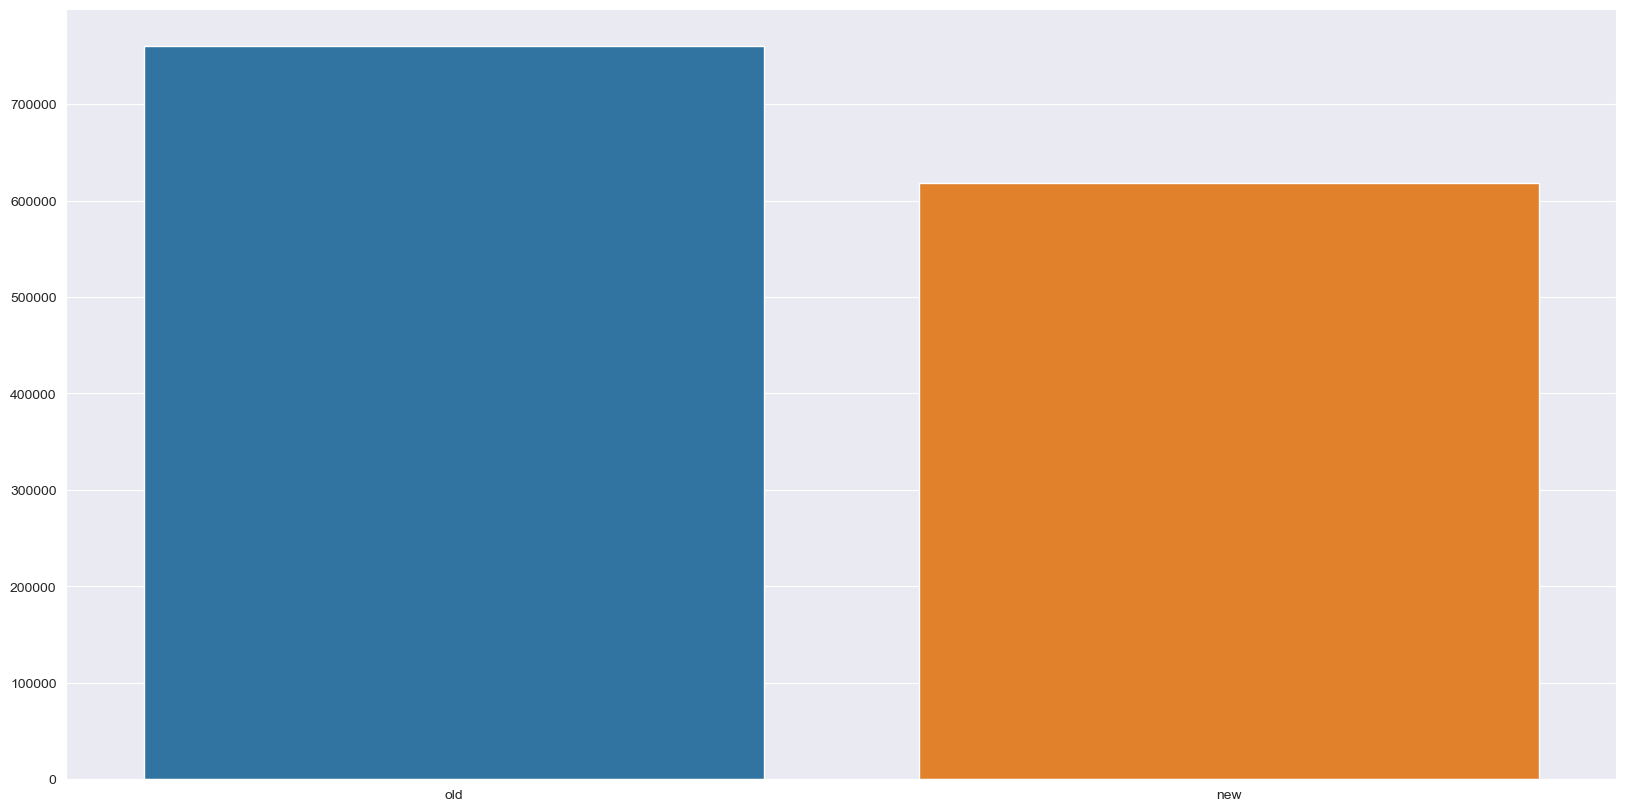

In [19]:
old = df_raw.loc[(df_raw.yr_renovated > 0) & (df_raw.yr_built < 2000),'price'].mean()
new = df_raw.loc[(df_raw.yr_renovated ==0 ) & (df_raw.yr_built >= 2000),'price'].mean()
aux = pd.DataFrame([old,new]).T.reset_index(drop=True)
aux = aux.rename(columns={0:'old',1:'new'})
aux['perc'] = (aux.old / aux.new -1)*100
print(aux)
sns.barplot(data=aux[['old','new']]);

##### 3.8. O valor médio dos imóveis com vista pra água tem uma diferença YoY abaixo de 10% [VERDADEIRO]

year       2014       2015  perc
0    1675652.12 1629825.51 -2.73


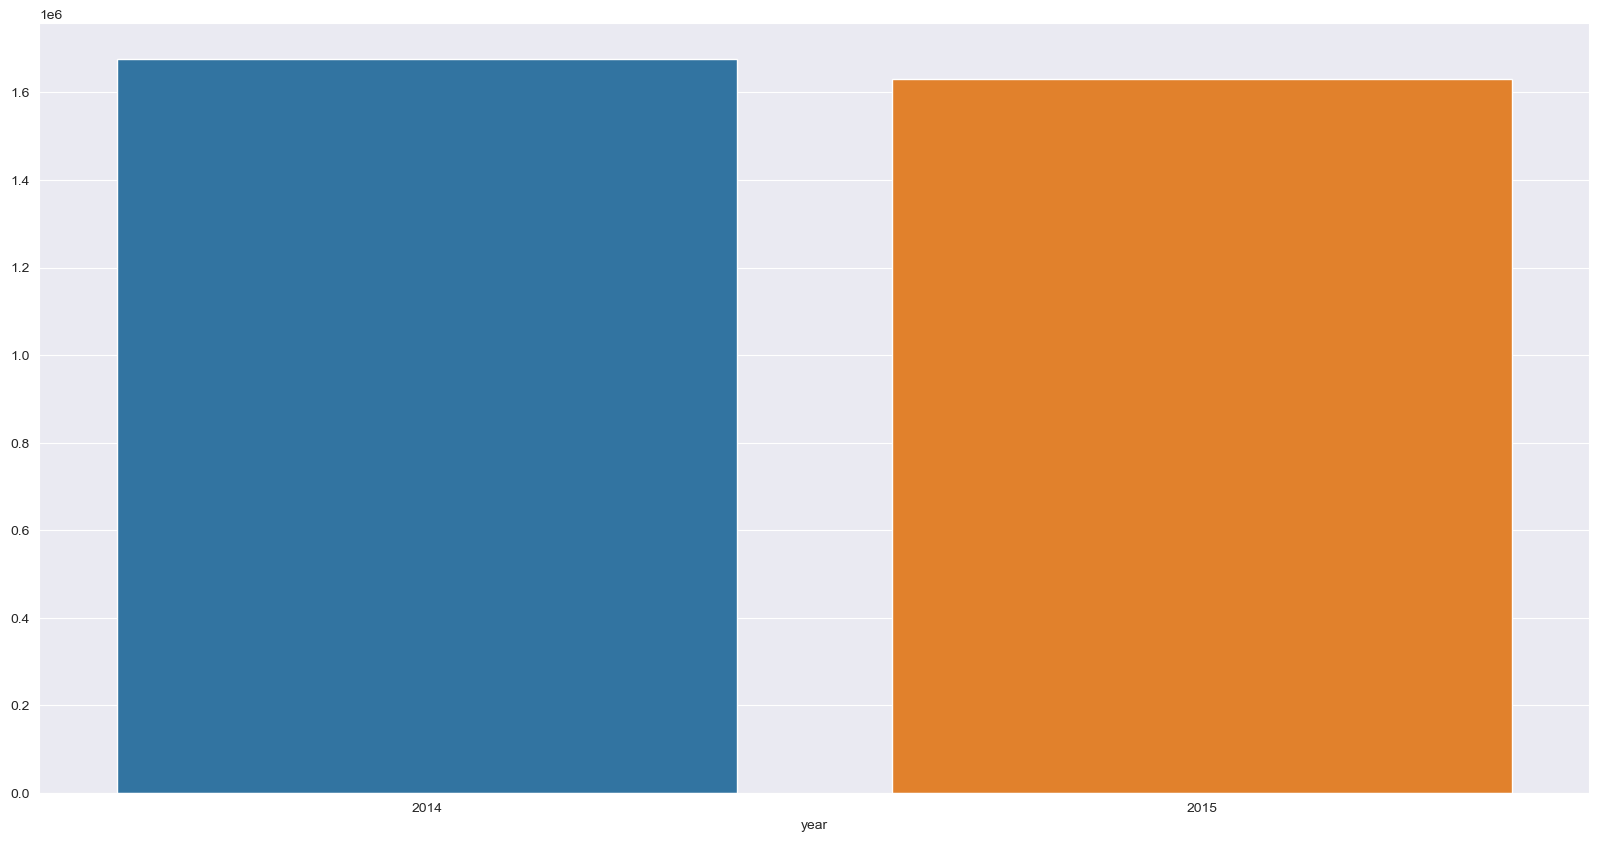

In [20]:
aux = df_raw.loc[df_raw['waterfront']==1,['year','price']].groupby('year').mean().T.reset_index(drop=True)
aux['perc'] = (aux[2015] / aux[2014] -1)*100
print(aux)
sns.barplot(data=aux[[2014,2015]]);

##### 3.9. Imóveis com mais de 3 quartos são mais caros que a média [VERDADEIRO]

   more_than3       all  perc
0   671018.37 540088.14 24.24


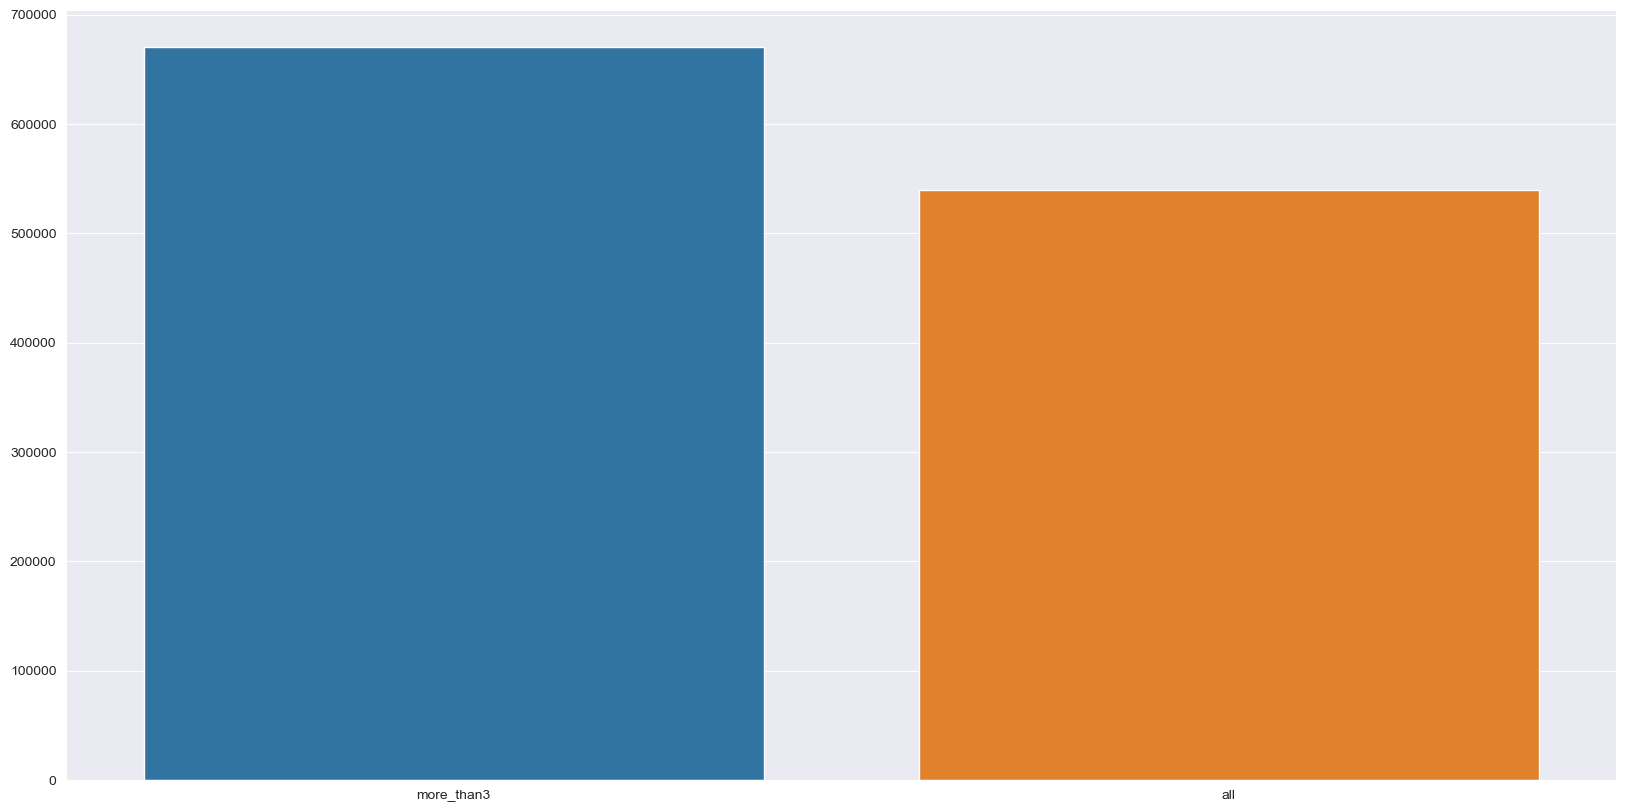

In [21]:
more_than3 = df_raw.loc[df_raw['bedrooms']>3,'price'].mean()
all = df_raw['price'].mean()
aux = pd.DataFrame([more_than3,all]).T.reset_index(drop=True)
aux = aux.rename(columns={0:'more_than3',1:'all'})
aux['perc'] = (aux['more_than3'] / aux['all'] -1)*100
print(aux)
sns.barplot(data=aux[['more_than3','all']]);

##### 3.10. Imóveis em boas condições com 1 andar são 20% mais caros que a média [FALSO]

     good1f       all   perc
0 452607.95 540088.14 -16.20


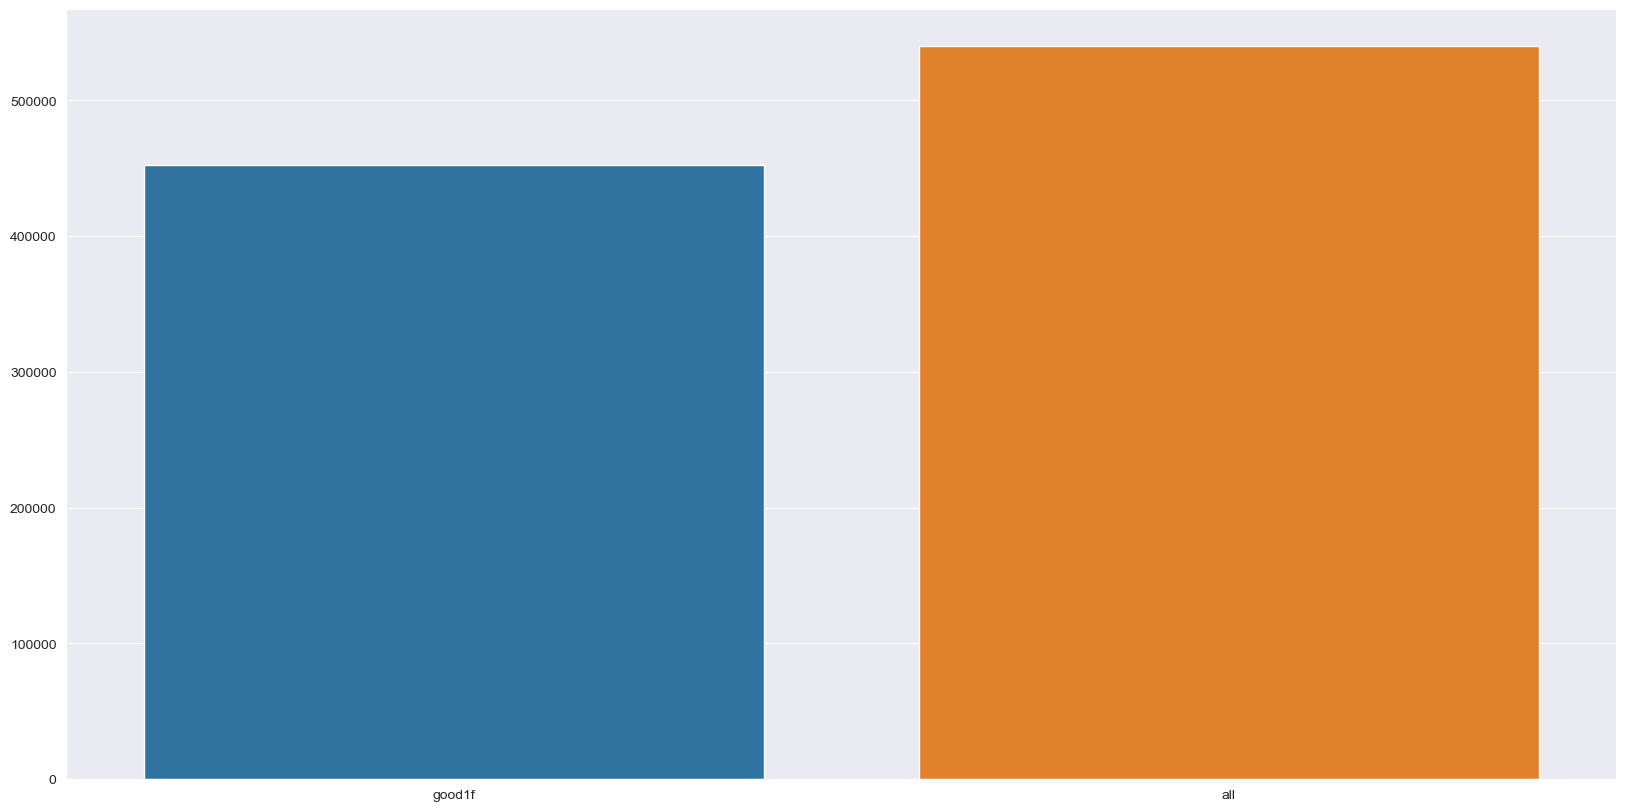

In [22]:
aux = df_raw[['id','floors','condition','price']].copy()
aux['condition_type'] = aux['condition'].apply(lambda x: 'bad' if x <= 2 else 'regular' if x in([3,4]) else 'good' )
good1f = aux.loc[( aux['floors']==1 ) & ( aux['condition_type']=='regular' ), 'price'].mean()
all = aux['price'].mean()
aux = pd.DataFrame([good1f,all]).T.reset_index(drop=True)
aux = aux.rename(columns={0:'good1f',1:'all'})
aux['perc'] = (aux['good1f'] / aux['all'] -1)*100
print(aux)
sns.barplot(data=aux[['good1f','all']]);

## 4. Exportar

In [41]:
df_raw = df_raw.drop_duplicates(subset='id',keep='last')
df_raw.to_csv("../data/processed/kc_house_processed.csv",index=False)